In [12]:
import pandas as pd
m_cols = ['Time','Action','User','Product', 'Quantity','Price']
orders = pd.read_csv('C:/Users/REGGIE/Desktop/数据分析资料/data/purchase_order.tab.txt', sep='\t',parse_dates={'Dates': [0]},names=m_cols, encoding='utf-8')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [13]:
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


# 探索用户购买记录

In [14]:
orders['Product'].head()

0       P0006944501
1       P0006018073
2       P0002267974
3       P0016144236
4    P0014516980122
Name: Product, dtype: object

In [18]:
orders[orders['Product'] == 'P0006944501']['Price'].describe()

count       8.0
mean     1069.0
std         0.0
min      1069.0
25%      1069.0
50%      1069.0
75%      1069.0
max      1069.0
Name: Price, dtype: float64

In [20]:
#查看有多少种product
orders['Product'].unique()

array(['P0006944501', 'P0006018073', 'P0002267974', ..., 'P0022884606',
       'P0013911085', 'P0025123755'], dtype=object)

In [21]:
len(orders['Product'].unique())

20054

In [22]:
orders.groupby('Product')['Price'].mean()

Product
P0000005913       1590.000
P0000006020       1290.000
P0000006591        999.000
P0000007744       3280.000
P0000008190011    5083.000
                    ...   
P0025361851       3149.000
P9913264561       3040.625
P9913264760       3000.000
P9913264771       3100.000
P9913265165        110.000
Name: Price, Length: 20054, dtype: float64

In [23]:
#对结果进行排序
orders.groupby('Product')['Price'].mean().sort_values(ascending = False)

Product
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
                 ...   
P0022822984         NaN
P0022827125         NaN
P0023532655         NaN
P0024243450         NaN
P0025213134         NaN
Name: Price, Length: 20054, dtype: float64

In [25]:
#一个用户购买总价格
orders['Title_price'] = orders['Quantity']* orders['Price']

In [26]:
orders.head()

,Dates,Action,User,Product,Quantity,Price,Title_price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0


In [28]:
#谁是花了最多钱的用户
orders.groupby('User')['Title_price'].sum().sort_values(ascending=False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Title_price, dtype: float64

# 读取用户浏览的商品记录

In [29]:
import pandas as pd
m_cols = ['Time','Action','User','Product']
views = pd.read_csv('C:/Users/REGGIE/Desktop/数据分析资料/data/purchase_view.tab.txt', sep='\t',parse_dates={'Dates': [0]},names=m_cols, encoding='utf-8')
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [34]:
orders_count = orders.groupby(['User','Product'])['Product'].count().reset_index(name = 'buys')
orders_count.head()

,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [36]:
views_count = views.groupby(['User','Product'])['Product'].count().reset_index(name = 'views')
views_count.head()

,User,Product,views
0,None,PNone,1
1,U10000000225,P0007107111,1
2,U10000000225,P0007107122,1
3,U10000000225,P0007107413,1
4,U10000000225,P0009440001,1


# 合并浏览和购买记录

In [37]:
merge_df = pd.merge(orders_count,views_count, on =['User','Product'],how = 'right')
merge_df.head()

,User,Product,buys,views
0,U10000044910,P0018800250,1.0,2
1,U10000056953,P0013834251,1.0,7
2,U10000065461,P0023597022,1.0,1
3,U10000092625,P0023729451,1.0,14
4,U10000092625,P0024236730,1.0,4


# 探究用户在不同日期与时间的消费习惯

In [39]:
#year,month, day,date, hour
views['Dates'].dt.date.head()

0    2015-07-01
1    2015-07-01
2    2015-07-01
3    2015-07-01
4    2015-07-01
Name: Dates, dtype: object

In [41]:
views_count_bydate = views.groupby(views['Dates'].dt.date)['Action'].count()
views_count_bydate

Dates
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
              ...  
2015-08-26    19867
2015-08-27    18985
2015-08-28    20438
2015-08-29    23000
2015-08-30    29138
Name: Action, Length: 61, dtype: int64

Populating the interactive namespace from numpy and matplotlib


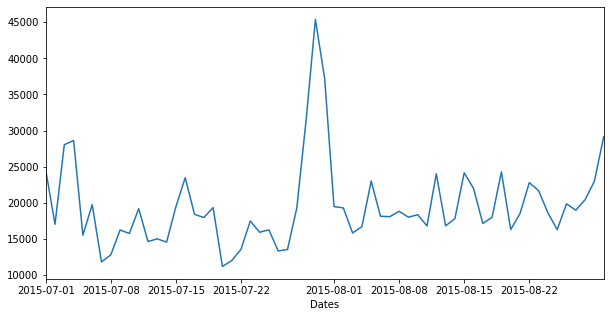

In [43]:
#根据图表获得一些消费习惯
%pylab inline

views_count_bydate.plot(kind = 'line',figsize = [10,5])

In [44]:
views_count_byhour = views.groupby(views['Dates'].dt.hour)['Action'].count()
views_count_byhour

Dates
0      69806
1      42582
2      24408
3      15930
4      10563
5       9712
6      10629
7      16583
8      31378
9      53407
10     65872
11     68441
12     57401
13     62543
14     63518
15     61706
16     58533
17     50435
18     40243
19     44868
20     61038
21     77600
22     93363
23    100927
Name: Action, dtype: int64

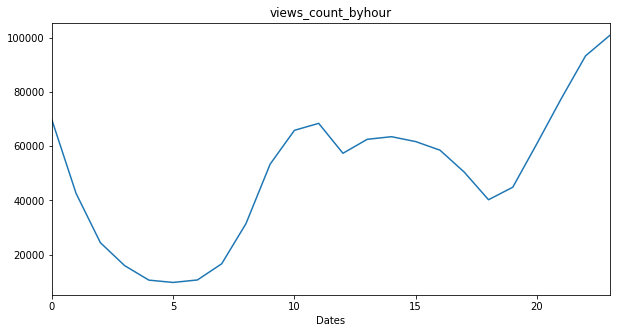

In [45]:
views_count_byhour.plot(kind = 'line',figsize = [10,5],title = 'views_count_byhour')

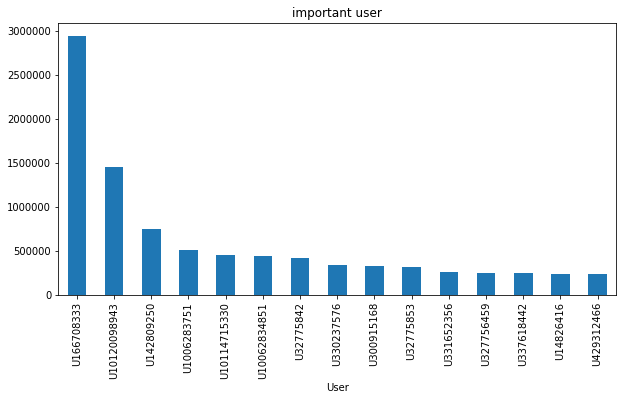

In [52]:
orders['Title_price'] = orders['Quantity']*orders['Price']
g = orders.groupby('User')['Title_price'].sum().sort_values(ascending =False)[0:15]
g.plot(kind = 'bar',figsize = [10,5],title = 'important user')

In [56]:
views_count_bydaily = views.groupby(views['Dates'].dt.date)['Action'].count()
orders_count_bydaily = orders.groupby(orders['Dates'].dt.date)['Action'].count()
views_count_bydaily.head()

Dates
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

In [55]:
orders_count_bydaily.head()

Dates
2015-07-01    2324
2015-07-02    2059
2015-07-03    1778
2015-07-04    2166
2015-07-05    1413
Name: Action, dtype: int64

In [67]:
df =pd.concat([views_count_bydaily,orders_count_bydaily],axis = 1, sort=True)
#合并之后存在空值，删除空值
df.dropna(inplace = True)
#第一列为浏览记录，第二列为下单记录
df.columns = ['views','orders']
df.head()

,views,orders
2015-07-01,24569,2324.0
2015-07-02,17043,2059.0
2015-07-03,28041,1778.0
2015-07-04,28625,2166.0
2015-07-05,15522,1413.0


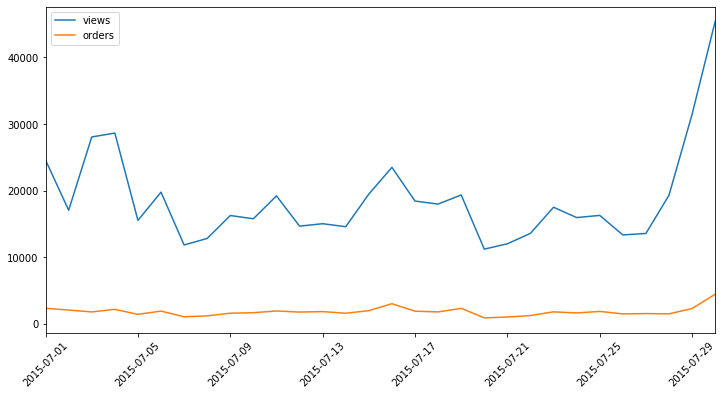

In [77]:
df.plot(kind = 'line', figsize = [12,6],rot = 45)